<a href="https://colab.research.google.com/github/Ayanlola2002/Datalit/blob/master/%5BData_Lit%5D_Logistic_Regression_Ayanlowo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Problem Objectives**

Our objective  here is to train a binary classifier on the us-data dataset to predict the column income_bracket which has two possible values “>50K” and “<=50K” and evaluate the accuracy of the classifier with the test dataset.

We would Apply sklearn model for prediction.as well as implementing logistic regression from scratch and get a good understanding of the key components of logistic regression:



> hypothesis function
> cost function
> decision boundary
>gradient descent algorithm

Finally,we would  compare the result gotten from built-in model versus implementation from scratch on various metrics.


DATA COLLECTION:

Follow the folowing links to know how to extract kaggle dataset using kaggle cli API and kaggle json file

(https://medium.com/@opalkabert/downloading-kaggle-datasets-into-google-colab-fb9654c94235)



In [0]:
#Installing kaggle CLI to extract data from kaggle
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle


In [0]:
#using the chmod commandline command to change the accessibility mode of kaggle json file
!chmod 600 /root/.kaggle/kaggle.json

In [173]:
#downloading us-data data sets from johnolafenwa kaggle page

!kaggle datasets download -d johnolafenwa/us-census-data

us-census-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
#unzippig the us-data file
from shutil import unpack_archive
#unpack_archive('all.zip')
unpack_archive('us-census-data.zip')




In [0]:
#importing neccessary libraries for logistic classifier
import pandas as pd
import numpy as np

import scipy as sp
from scipy.stats import norm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, make_scorer, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.core.pylabtools import figsize

import warnings
warnings.filterwarnings('ignore')

EXPLORATORY DATA ANALYSIS

The us-data dataset is made up of categorical and continuous features. It also contains missing values.

The categorical columns are: workclass, education, marital_status, occupation, relationship, race, gender, native_country

The continuous columns are: age, education_num, capital_gain, capital_loss, hours_per_week,flnwgt

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights.

In [0]:
#Add Headings to dataset 
#we create a dictionary of all cols,categorical cols,continous varriable cols as

columns = ["age", "workclass", "fnlwgt", "education", "education_num", 
           "marital_status", "occupation", "relationship", "race", "gender", 
           "capital_gain", "capital_loss", "hours_per_week", "native_country", "income_bracket"]

cat_cols = ["workclass", "education", "marital_status", "occupation","relationship", "race", "gender", "native_country"]
cont_cols = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

target_col_name = 'income_bracket'

In [0]:
train_data = pd.read_csv('adult-training.csv',names=columns,skipinitialspace=True)
test_data=pd.read_csv('adult-test.csv',names=columns,skiprows=1)

In [178]:
train_data.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [179]:
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [180]:
#showing the structure of data metadata i.e datatypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [181]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
gender            16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
income_bracket    16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


The information about the data states that the data contains missing values.but all the features values seems to be non-null

we need to look into each features more closely.to check for irrational data values like ?,& etc

we start with the catagorical varriabes:work class,education



In [182]:
train_data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [183]:
train_data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [184]:
train_data['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [185]:
train_data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [186]:

train_data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [187]:
train_data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [188]:
train_data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [189]:

train_data['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [190]:
train_data['income_bracket'].unique()

array(['<=50K', '>50K'], dtype=object)

DATA CLEANING

we would replace all ? character with nan values

In [0]:
train_data.replace('?', np.nan, inplace=True)

In [192]:
test_data['workclass'].unique()

array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [0]:
test_data.replace(' ?',np.nan, inplace=True)

In [194]:
#checking for nulls values
train_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income_bracket       0
dtype: int64

In [195]:
test_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
gender              0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income_bracket      0
dtype: int64

In [0]:

# Feature engineer the label
train_data['label'] = train_data[target_col_name].apply(lambda x: 1 if x == '>50K' else 0)



In [0]:
test_data['label'] = test_data[target_col_name].apply(lambda x: 1 if x == '>50K' else 0)

In [198]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [199]:
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.,0


Data Visualization

Data Visualization is neccessary to get relationship between the features. we ll use the heat map,pair plot,distribution plots ,barplots to get the correlation between the labels representing target varriable (income target) and each other features 

The following links gives good solid backgrounds on understanding this plots


1.   https://medium.com/swlh/effective-visualization-of-multi-dimensional-data-a-hands-on-approach-b48f36a56ee8(very neccessary)

2.  https://www.kaggle.com/jiexus/feature-selection-and-data-visualization 


3.   https://towardsdatascience.com/analyzing-a-dataset-the-step1-of-machine-learning-which-often-gets-overlooked-415ca65ed2f1

4.  https://github.com/PacktPublishing/Feature-Engineering-Made-Easy/blob/master/Chapter02/Data%20EDA.ipynb






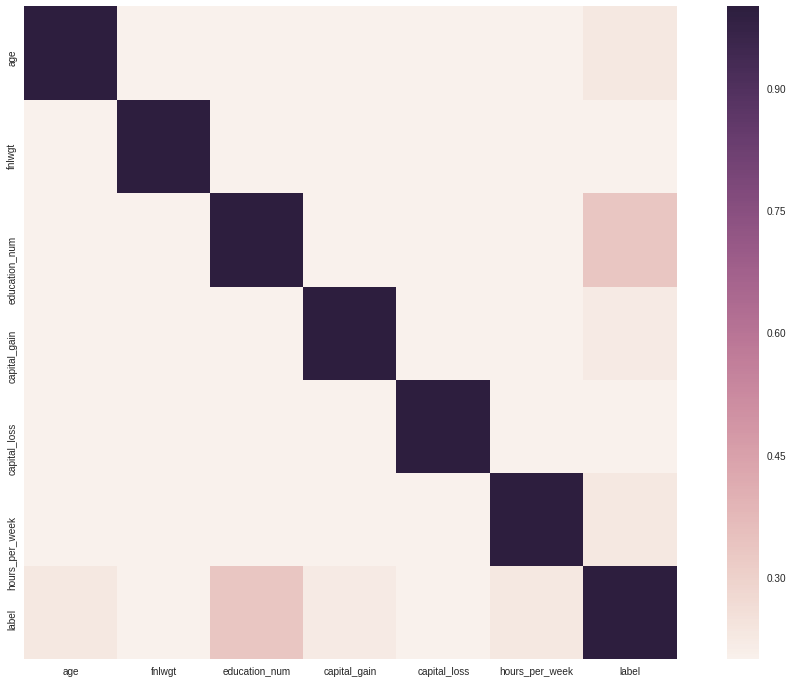

In [200]:

corr_matrix = train_data.corr(method='pearson')
f, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corr_matrix, vmin=0.2, square=True)

In [0]:
largest_corrs = corr_matrix.nlargest(10,'label')['label']


In [202]:
largest_corrs

label             1.000000
education_num     0.335154
age               0.234037
hours_per_week    0.229689
capital_gain      0.223329
capital_loss      0.150526
fnlwgt           -0.009463
Name: label, dtype: float64

In [203]:
#determining the best correlation
best_corr_index = largest_corrs[1:5].index
best_corr_index

Index(['education_num', 'age', 'hours_per_week', 'capital_gain'], dtype='object')

In [204]:
#
cm = np.corrcoef(train_data[best_corr_index].values.T)
cm


array([[1.        , 0.03652719, 0.14812273, 0.12263011],
       [0.03652719, 1.        , 0.06875571, 0.0776745 ],
       [0.14812273, 0.06875571, 1.        , 0.07840862],
       [0.12263011, 0.0776745 , 0.07840862, 1.        ]])

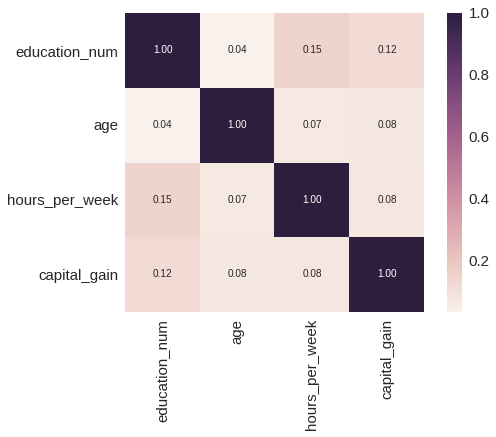

In [205]:
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=best_corr_index.values, xticklabels=best_corr_index.values)
plt.show()

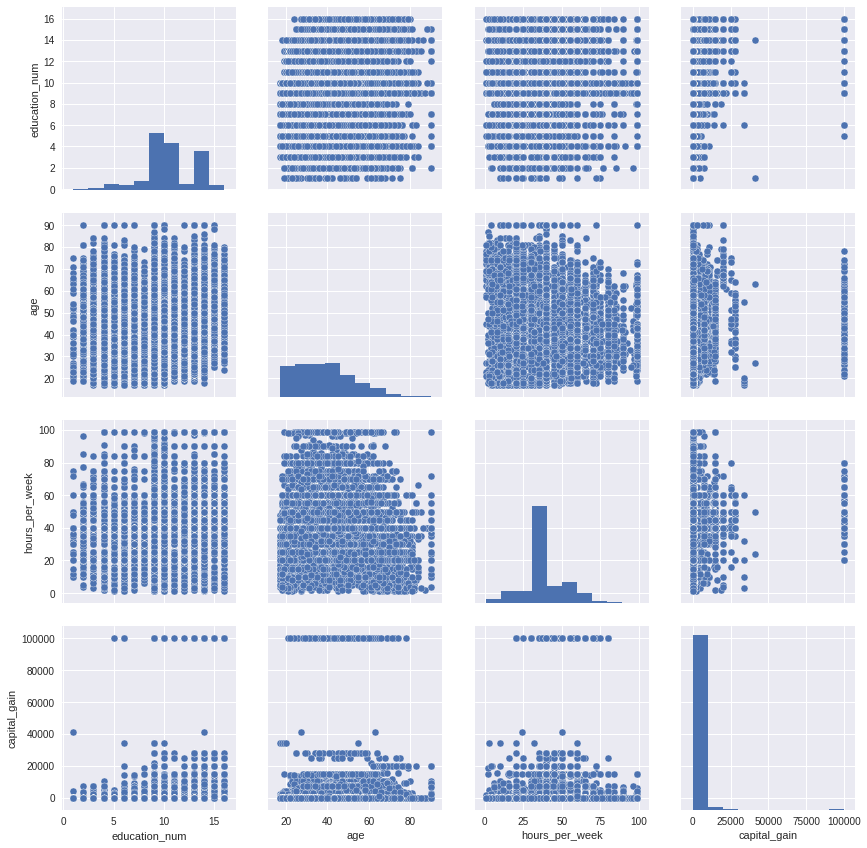

In [206]:
#using  Scatterplot to create a 2 dimmensional relationship between two features
sns.set()
sns.pairplot(train_data[best_corr_index], size=3)
plt.show()

The above results shows from the heatmap the education_num is the most correlated followed by age.and from the the scatter plots 
very small number of people has large capital gain

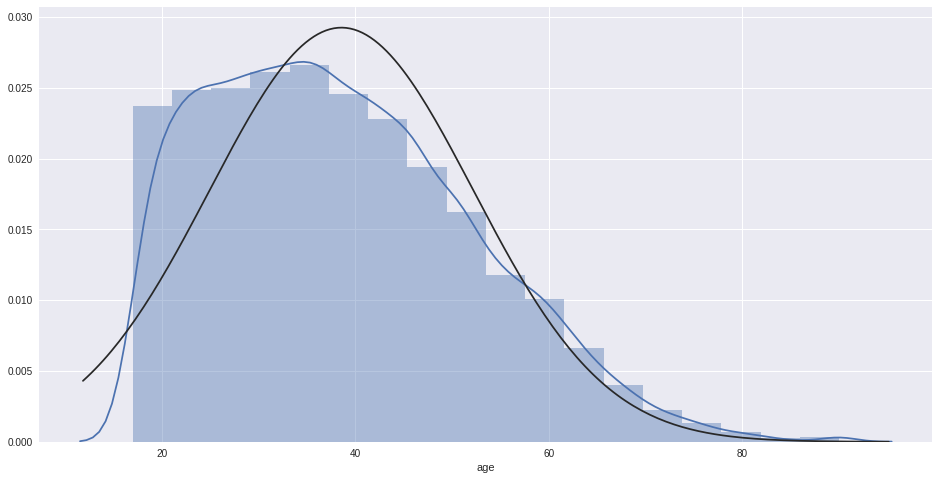

In [207]:
#sketching a distrbution plots
figsize(16,8)
sns.distplot(train_data['age'], hist=True, bins=int(90/5), fit=norm)

The above plots for age shows that age is positively skewed.


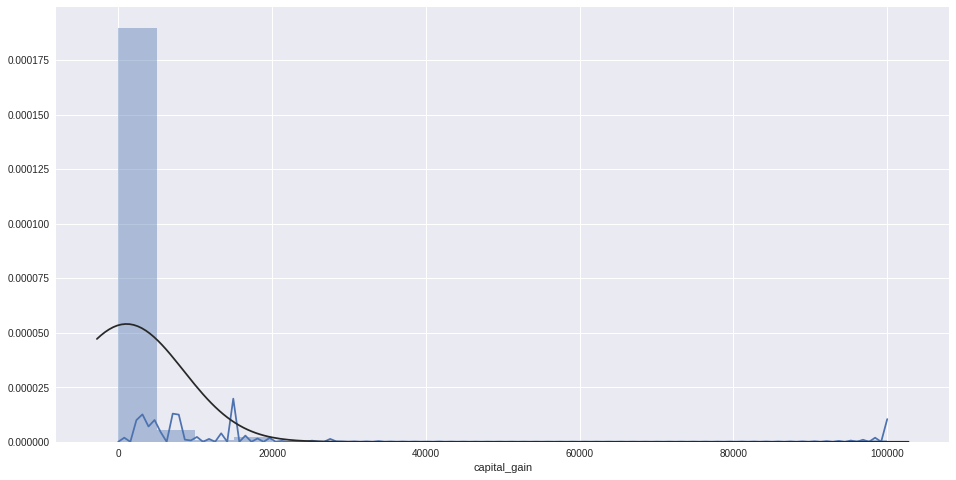

In [208]:
figsize(16,8)
sns.distplot(train_data['capital_gain'], hist=True, bins=int(100000/5000), fit=norm)

In [209]:
train_data['capital_gain'][train_data['capital_gain'] > 80000].count()

159

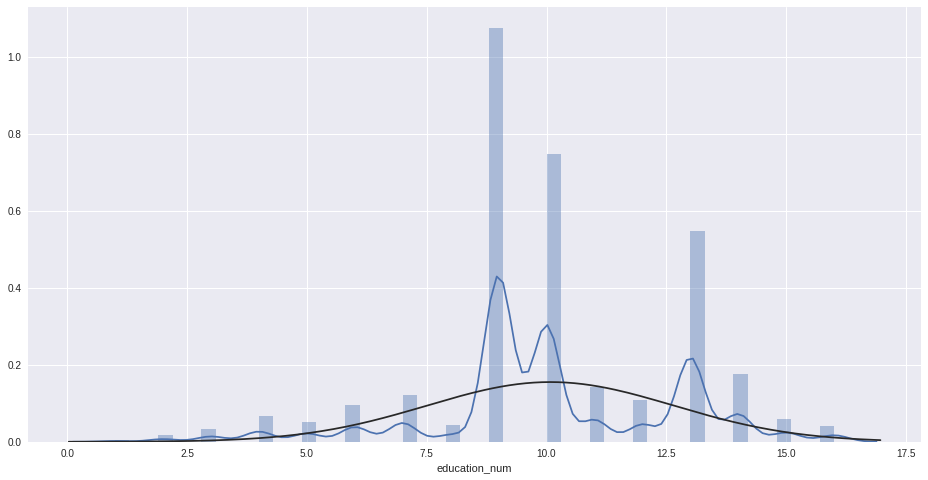

In [210]:

figsize(16,8)
sns.distplot(train_data['education_num'], hist=True, fit=norm)

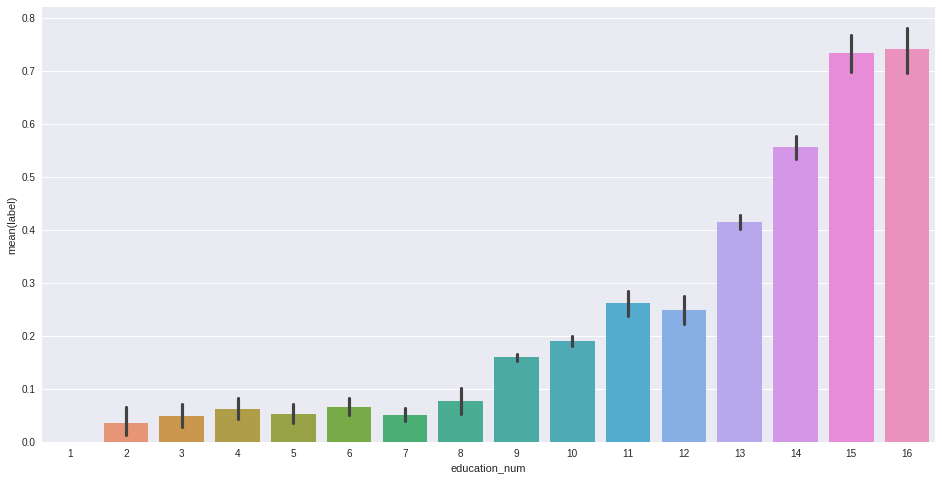

In [211]:
sns.barplot(x='education_num', y='label', data=train_data)

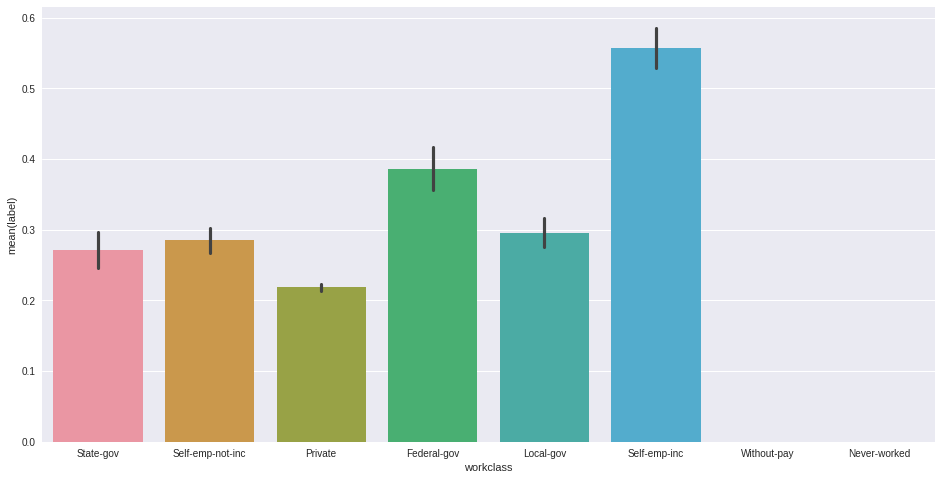

In [212]:
sns.barplot(x='workclass', y='label', data=train_data)

In [213]:
train_data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Might be worth consolidating without-pay and never-worked - not much data for them

In [214]:
train_data['workclass'].isnull().sum()

1836

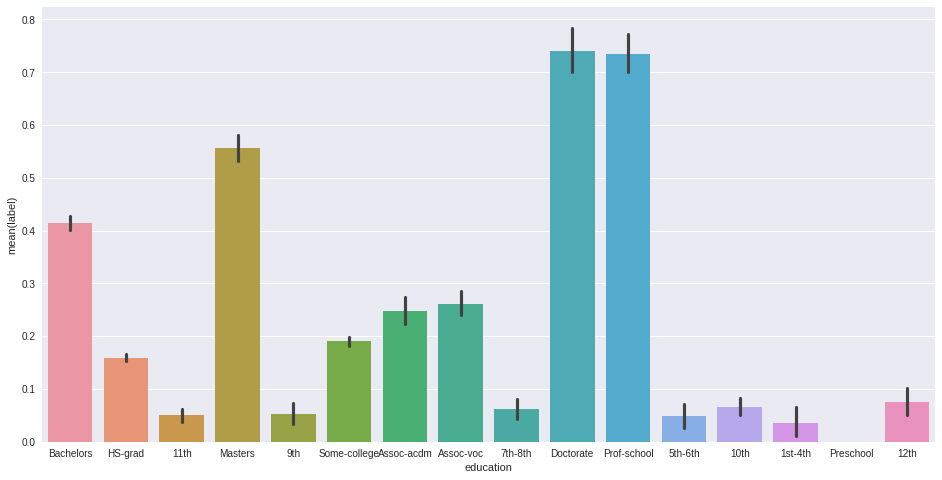

In [215]:
sns.barplot(x='education', y='label', data=train_data)

In [0]:
train_data['workclass'].fillna(' 0', inplace=True)
test_data['workclass'].fillna(' 0', inplace=True)

Never-worked and Without-pay look very similar, we merge them.

In [0]:
train_data['workclass'].replace(' Without-pay', ' Never-worked', inplace=True)
test_data['workclass'].replace(' Without-pay', ' Never-worked', inplace=True)

In [0]:
train_data['fnlwgt'] = train_data['fnlwgt'].apply(lambda x: np.log1p(x))
test_data['fnlwgt'] = test_data['fnlwgt'].apply(lambda x: np.log1p(x))

In [219]:
train_data['fnlwgt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlwgt, dtype: float64

In [220]:
train_data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Might be worth consolidating all the grade levels and preschool into "school"

In [0]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th','Preschool']:
        return ' school'
    else:
        return x

In [0]:
train_data['education'] = train_data['education'].apply(primary)
test_data['education'] = test_data['education'].apply(primary)

In [0]:
train_data['education'].fillna('0',inplace=True)
test_data['education'].fillna(' 0', inplace=True)

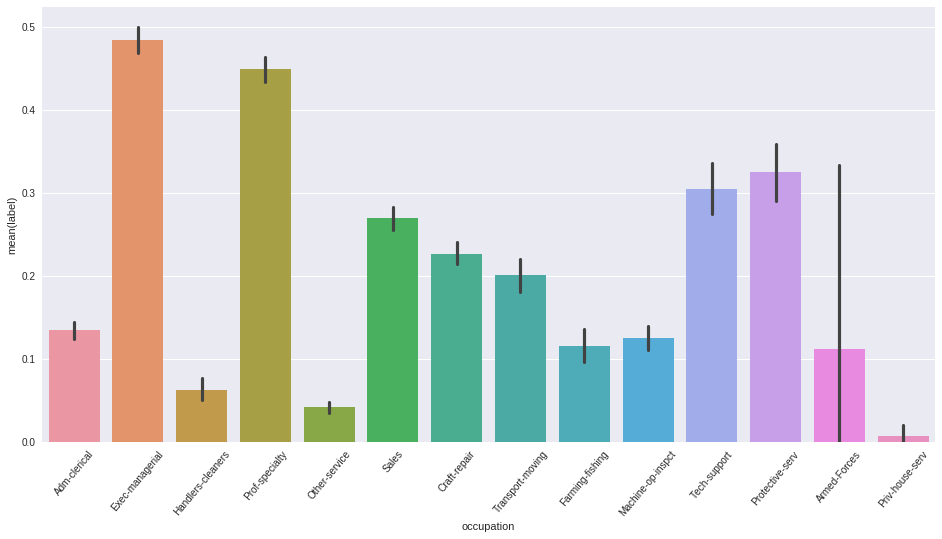

In [223]:

plt.xticks(rotation=50)
sns.barplot(x='occupation', y='label', data=train_data)

In [224]:
train_data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Everything looks good, except Armed-Forces. They are similar to 0 and that's what we replace them with.

In [0]:
train_data['occupation'].fillna(' 0', inplace=True)
test_data['occupation'].fillna(' 0', inplace=True)

In [0]:
train_data['occupation'].replace(' Armed-Forces', ' 0', inplace=True)
test_data['occupation'].replace(' Armed-Forces', ' 0', inplace=True)

There are very few Married-AF-spouse features. They are similar to Married-civ-spouse, so we can merge them.

In [227]:
train_data['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [0]:
train_data['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test_data['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)

In [229]:
train_data['marital_status'].fillna('0')
test_data['marital_status'].fillna(' 0')

0              Never-married
1         Married-civ-spouse
2         Married-civ-spouse
3         Married-civ-spouse
4              Never-married
5              Never-married
6              Never-married
7         Married-civ-spouse
8              Never-married
9         Married-civ-spouse
10        Married-civ-spouse
11        Married-civ-spouse
12             Never-married
13        Married-civ-spouse
14        Married-civ-spouse
15        Married-civ-spouse
16             Never-married
17        Married-civ-spouse
18                   Widowed
19        Married-civ-spouse
20        Married-civ-spouse
21             Never-married
22                  Divorced
23             Never-married
24        Married-civ-spouse
25        Married-civ-spouse
26             Never-married
27                 Separated
28        Married-civ-spouse
29             Never-married
                ...         
16251     Married-civ-spouse
16252     Married-civ-spouse
16253          Never-married
16254     Marr

In [230]:
train_data['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [231]:
train_data['relationship'].fillna('0')
test_data['relationship'].fillna(' 0')

0              Own-child
1                Husband
2                Husband
3                Husband
4              Own-child
5          Not-in-family
6              Unmarried
7                Husband
8              Unmarried
9                Husband
10               Husband
11               Husband
12         Not-in-family
13               Husband
14               Husband
15               Husband
16             Own-child
17                  Wife
18             Unmarried
19               Husband
20               Husband
21             Own-child
22         Not-in-family
23         Not-in-family
24               Husband
25               Husband
26             Own-child
27             Unmarried
28               Husband
29         Not-in-family
              ...       
16251            Husband
16252            Husband
16253      Not-in-family
16254            Husband
16255            Husband
16256          Own-child
16257      Not-in-family
16258            Husband
16259     Other-relative


In [232]:
train_data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [233]:
train_data['race'].fillna('0')
test_data['race'].fillna(' 0')

0                      Black
1                      White
2                      White
3                      Black
4                      White
5                      White
6                      Black
7                      White
8                      White
9                      White
10                     White
11                     White
12                     White
13                     White
14                     White
15                     White
16                     White
17                     White
18                     White
19        Asian-Pac-Islander
20                     White
21                     Black
22                     White
23                     White
24                     White
25                     White
26                     White
27                     Black
28                     White
29                     White
                ...         
16251                  White
16252                  White
16253                  White
16254         

In [234]:
train_data['gender'].value_counts()

Male      21790
Female    10771
Name: gender, dtype: int64

In [235]:
train_data['gender'].fillna('0')
test_data['gender'].fillna(' 0')

0           Male
1           Male
2           Male
3           Male
4         Female
5           Male
6           Male
7           Male
8         Female
9           Male
10          Male
11          Male
12        Female
13          Male
14          Male
15          Male
16          Male
17        Female
18        Female
19          Male
20          Male
21        Female
22        Female
23          Male
24          Male
25          Male
26          Male
27          Male
28          Male
29          Male
          ...   
16251       Male
16252       Male
16253     Female
16254       Male
16255       Male
16256       Male
16257     Female
16258       Male
16259     Female
16260     Female
16261       Male
16262       Male
16263       Male
16264       Male
16265     Female
16266     Female
16267     Female
16268       Male
16269       Male
16270       Male
16271       Male
16272       Male
16273     Female
16274       Male
16275       Male
16276     Female
16277       Male
16278       Ma

In [236]:
train_data['native_country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [0]:
train_data['native_country'].fillna(' 0', inplace=True)
test_data['native_country'].fillna(' 0', inplace=True)

ONE HOT ENCODING


In Encoding categorical features, we will use "pd.get_dummies()"". we merge datasets to ensure  dimensions for both datasets are equal and also that given feature corresponds to the same dimension in both train and test datasets.

In [0]:
#merge datasets
joint = pd.concat([train_data, test_data], axis=0)

In [239]:
#Analize features, find categorical ones and one-hot encode them.
joint.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income_bracket     object
label               int64
dtype: object

In [0]:
#list of columns with dtype: object
categorical_features = joint.select_dtypes(include=['object']).axes[1]

In [241]:
for col in categorical_features:
    print (col, joint[col].nunique())

workclass 16
education 32
marital_status 13
occupation 28
relationship 12
race 10
gender 4
native_country 82
income_bracket 4


In [0]:
#one-hot encode
for col in categorical_features:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    joint.drop(col, axis=1, inplace=True)

In [243]:
joint.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,label,workclass: 0,workclass: Federal-gov,workclass: Local-gov,...,native_country:Taiwan,native_country:Thailand,native_country:Trinadad&Tobago,native_country:United-States,native_country:Vietnam,native_country:Yugoslavia,income_bracket: <=50K.,income_bracket: >50K.,income_bracket:<=50K,income_bracket:>50K
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [0]:
#Now We separate train and test datasets.
train_data =joint.head(train_data.shape[0])
test_data =joint.tail(test_data.shape[0])

In [245]:
train_data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,label,workclass: 0,workclass: Federal-gov,workclass: Local-gov,...,native_country:Taiwan,native_country:Thailand,native_country:Trinadad&Tobago,native_country:United-States,native_country:Vietnam,native_country:Yugoslavia,income_bracket: <=50K.,income_bracket: >50K.,income_bracket:<=50K,income_bracket:>50K
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,37,12.558780,14,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,49,11.984103,5,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,52,12.253161,9,0,0,45,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,31,10.731646,14,14084,0,50,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,42,11.979486,13,5178,0,40,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [0]:
#We devide data frame into features and targets. Then standarize features.
Xtrain = train_data.drop('label', axis=1)
Ttrain = train_data['label']
Xtest = test_data.drop('label', axis=1)
Ttest = test_data['label']

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [0]:
#Logistic regression data prediction
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


model = LogisticRegression()
model.fit(Xtrain, Ttrain)

Ytrain = model.predict(Xtrain)
Ytest = model.predict(Xtest)

In [249]:
print(classification_report(Ttrain, Ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24720
           1       1.00      1.00      1.00      7841

   micro avg       1.00      1.00      1.00     32561
   macro avg       1.00      1.00      1.00     32561
weighted avg       1.00      1.00      1.00     32561



In [250]:
print(classification_report(Ttest, Ytest))

              precision    recall  f1-score   support

           0       1.00      0.24      0.38     16281
           1       0.00      0.00      0.00         0

   micro avg       0.24      0.24      0.24     16281
   macro avg       0.50      0.12      0.19     16281
weighted avg       1.00      0.24      0.38     16281




Understanding Logistic classifier 
the following links will be of help for begginners

1.   https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

2.   https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f

3.  https://becominghuman.ai/logistic-regression-in-python-from-scratch-954c0196d258
 
4.   https://www.kaggle.com/jeppbautista/logistic-regression-from-scratch-python


Own Logistic Regression

In this assignment, you are expected to implement logistic regression and get a good understanding of the key components of logistic regression:



>hypothesis function


> cost function


> decision boundary

> gradient descent algorithm


Finally, compare the result you got from built-in model versus your own implementation on various metrics.

Background

The logistic regression model is to determine whether a set of inputs is a specific binary classification of 0 or 1.

Y can either be 0 or 1, so that p(y=1) + p(y=0) = 1

Linear Regression Background

The multivariate linear regression equation is:

$Y = \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

where:

 $x_0$ = 1
 $\beta$ is the standardised regression coefficients or beta weights 
 applied to each $x$ feature value, including the bias $\beta_0$. 
 $\beta$ weights are the estimates resulting from regression analysis that typically have been standardised so the variances of dependent and independent variables are 1 - i.e. how many standard deviations the dependent (Y) variable changes.
This reduces to:

$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$
which can also be written as $\beta$ Transpose $x$:

$Y = \beta^Tx$
where:

$x$ is the feature vector with $x_0 = 1$
\

The hypothesis of linear regression is represented with the unknown parameters $\theta$ instead of $\beta$:

$h_\theta(x) = \theta_0 + \theta_1 x_1  + \theta_2 x_2  + ... + \theta_n x_n$
Which can be written as $\theta$ Transpose $x$:

$h_\theta(x) = \theta^Tx$
where:

$\theta$ is the regression model's unknown parameter/weight vector for $x_n$, including the bias $\theta_0$
$x$ is the feature vector with $x_0 = 1$
\

Logistic Regression Hypothesis Function
There are only two feature values: $x_1$ and $x_2$ in this logistic regression.

The hypothesis function is the estimated probability that y=1 on a given input x, parameterised by $\theta$.

$h_\theta(x) = \theta_0 + \theta_1 x_1  + \theta_2 x_2$
which can still be written as $\theta$ Transpose $x$:

$h_\theta(x) = \theta^Tx$
where:

$x$ is the feature vector with $x_0 = 1$
\

The logistic function being binary means we can use the Sigmoid function to return a value from 0 to 1:

$h_\theta(x) = \sigma(\theta^Tx)$
And the Sigmoid function is:

$\sigma(z) =  \frac{1}{1 + e^{-z} }$
And combining the maths, the hypothesis function is:

$h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}$
where:

if $\theta^Tx$ > 0, then $h_\theta(x) &gt; 0.5$
if $\theta^Tx$ < 0, then $h_\theta(x) &lt; 0.5$
\

In the code below, the following terminology is equivalent:

features

x
feature vector

set of feature values

independent variables


weights


>theta

> beta

>beta weights

> standardised regression coefficients
















labels

> y



In [0]:
def sigmoid(z):
  '''
  Returns the sigmoid of z.
  Given the logit (AKA the log of the odds), then the sigmoid inverses the log and returns the original value of the odds.
  '''
  return 1 / (1 + np.exp(-z))


def predict(features, weights):
  '''
  Returns a 1D array of probabilities that the class label is True/Yes/1
  The dot product of the features (True or False) and theta/beta/weights (B_k) will give us the logit(p), which is B0 + B1 True + B2 False
  The sigmoid inverses the logit to give us p, the probability.
  '''
  return sigmoid( np.dot(features, weights) )

Cost function

Cross entropy / log loss is used in Logistic Regression.

There are two cost functions in logistic regression:

if y=1 : $cost(h_\theta(x), y) = -log(h_\theta(x))$
if y=0 : $cost(h_\theta(x), y) = -log(1 - h_\theta(x))$
Note: this means that reducing confident wrong predictions is more beneficial for obtaining a higher score

In [0]:
def cost_function_for_all_training_samples(features, labels, weights):
  m = features.shape[0]  # m = number of samples
  predictions = predict(features, weights)
  return -(1/m) * np.sum( labels*np.log(predictions) + (1-labels)*np.log(1-predictions) )

Decision boundary

With Sigmoid ranging from 0 to 1, the probability of 0.5 can be used as the decision boundary or threshold to determine the classes.

In [0]:
def decision_boundary(probability, threshold=0.5):
  return 1 if probability >= threshold else 0

Gradient descent

In [0]:
def calculate_gradient(features, labels, weights):
    predictions = predict(features, weights)
    matrixOfAggregateSlopeOfCostFunction = np.dot(features.T, predictions - labels)
    return matrixOfAggregateSlopeOfCostFunction
  

def update_weights(features, labels, weights, lr):

    matrixOfAggregateSlopeOfCostFunction = calculate_gradient(features, labels, weights)

    m = len(features)
    averageCostDerivativeForEachFeature = matrixOfAggregateSlopeOfCostFunction / m

    gradient = averageCostDerivativeForEachFeature * lr

    return weights - gradient


def fit(features, labels, weights, lr, iterations):

    for i in range(iterations):
        weights = update_weights(features, labels, weights, lr)

        # Log Progress
        if i % 100 == 0:
          cost = cost_function_for_all_training_samples(features, labels, weights)
          print("iteration:", str(i), "cost:", str(cost))

    return weights
  
  
def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  decide = np.vectorize(decision_boundary)
  return decide(predictions).flatten()

In [0]:
initial_weights = [0] * x_train.shape[1]
lr = 0.2
iterations = 3001

weights = fit(x_train, y_train, initial_weights, lr, iterations)

In [0]:
y_train_probabilities = predict(x_train, weights).flatten()
y_train_pred = classify(y_train_probabilities)

accuracy_score(y_train_pred, y_train)


Final Result
My regression scored 0.82 and the scikit learn one scored 0.84.

For 0, this was slightly more precise, but with worse recall and f1-score.
For 1, this was less precise but had a better recall and f1-score.

In [0]:
y_test_probabilities = predict(x_test, weights).flatten()
y_test_pred = classify(y_test_probabilities)

accuracy_score(y_test_pred, y_test)

In [0]:
print(classification_report(y_test, y_test_pred))